# 1. Import Python Libraries
-------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Read the data
-----------------

In [2]:
df = pd.read_csv('game scales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.shape

(16598, 11)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 3. Statistical analysis
------------------

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.describe(include="object")

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


# 4. Handling Missing Values
------------

In [9]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df['Year'].fillna(df['Year'].median(), inplace=True)

In [12]:
df['Publisher'].fillna('Unknown', inplace=True)

In [13]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# 5. Handling Duplicates
-------------------

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(16598, 11)

In [17]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 6. Find the Outliers & Handling Outliers
-------------

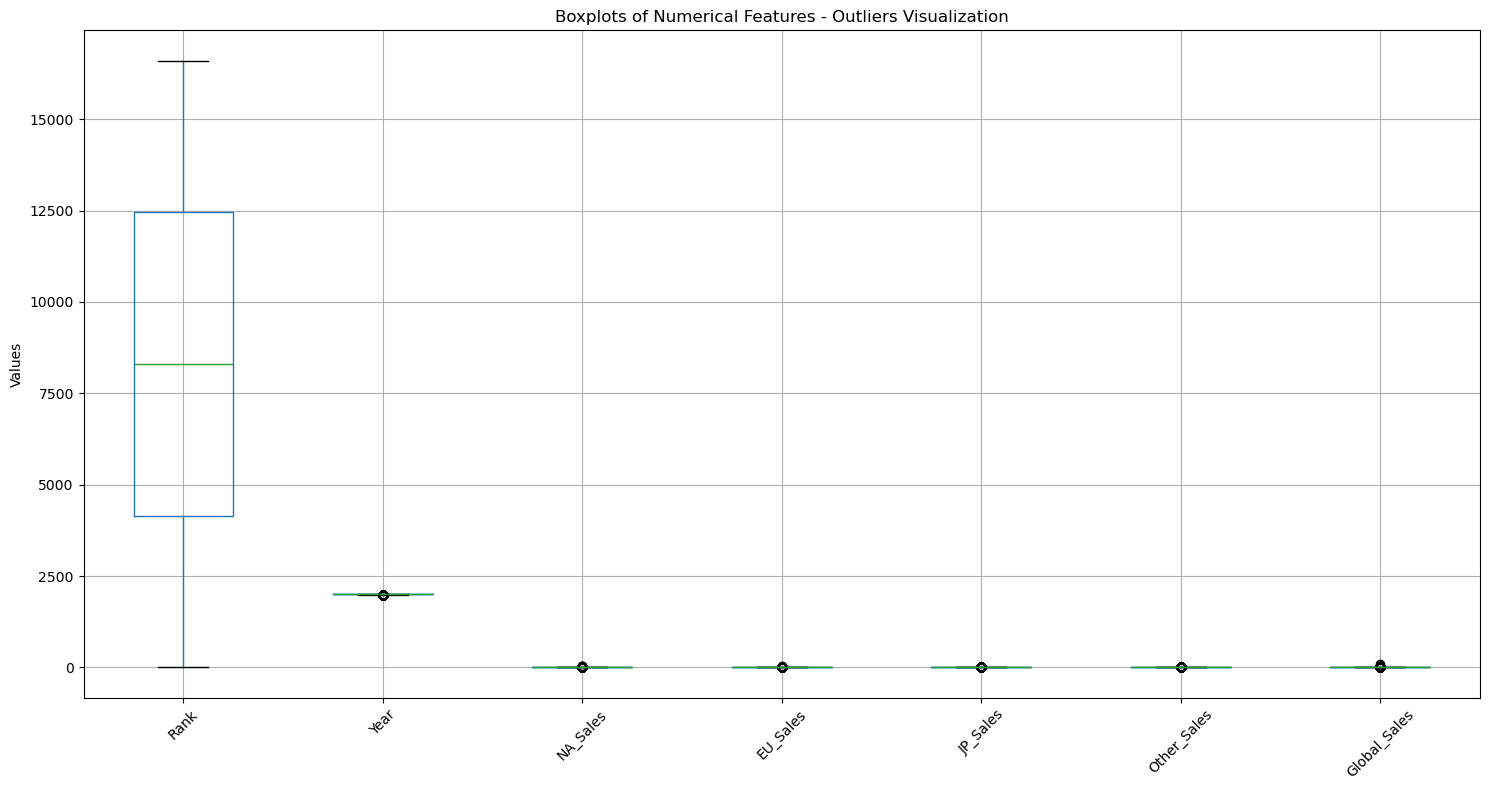

In [18]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Features - Outliers Visualization')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

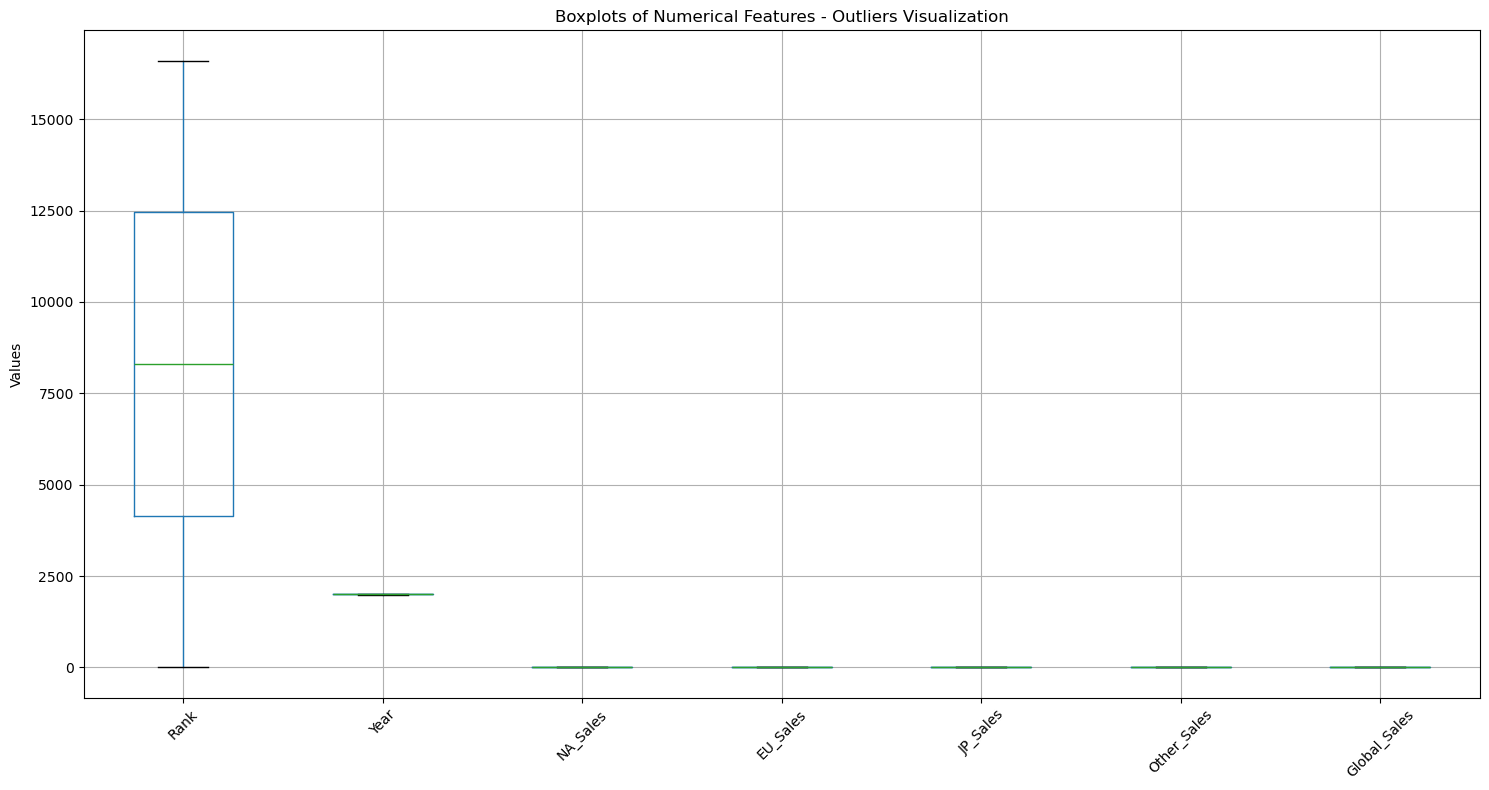

In [20]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Features - Outliers Visualization')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Visual Analysis 
------------------

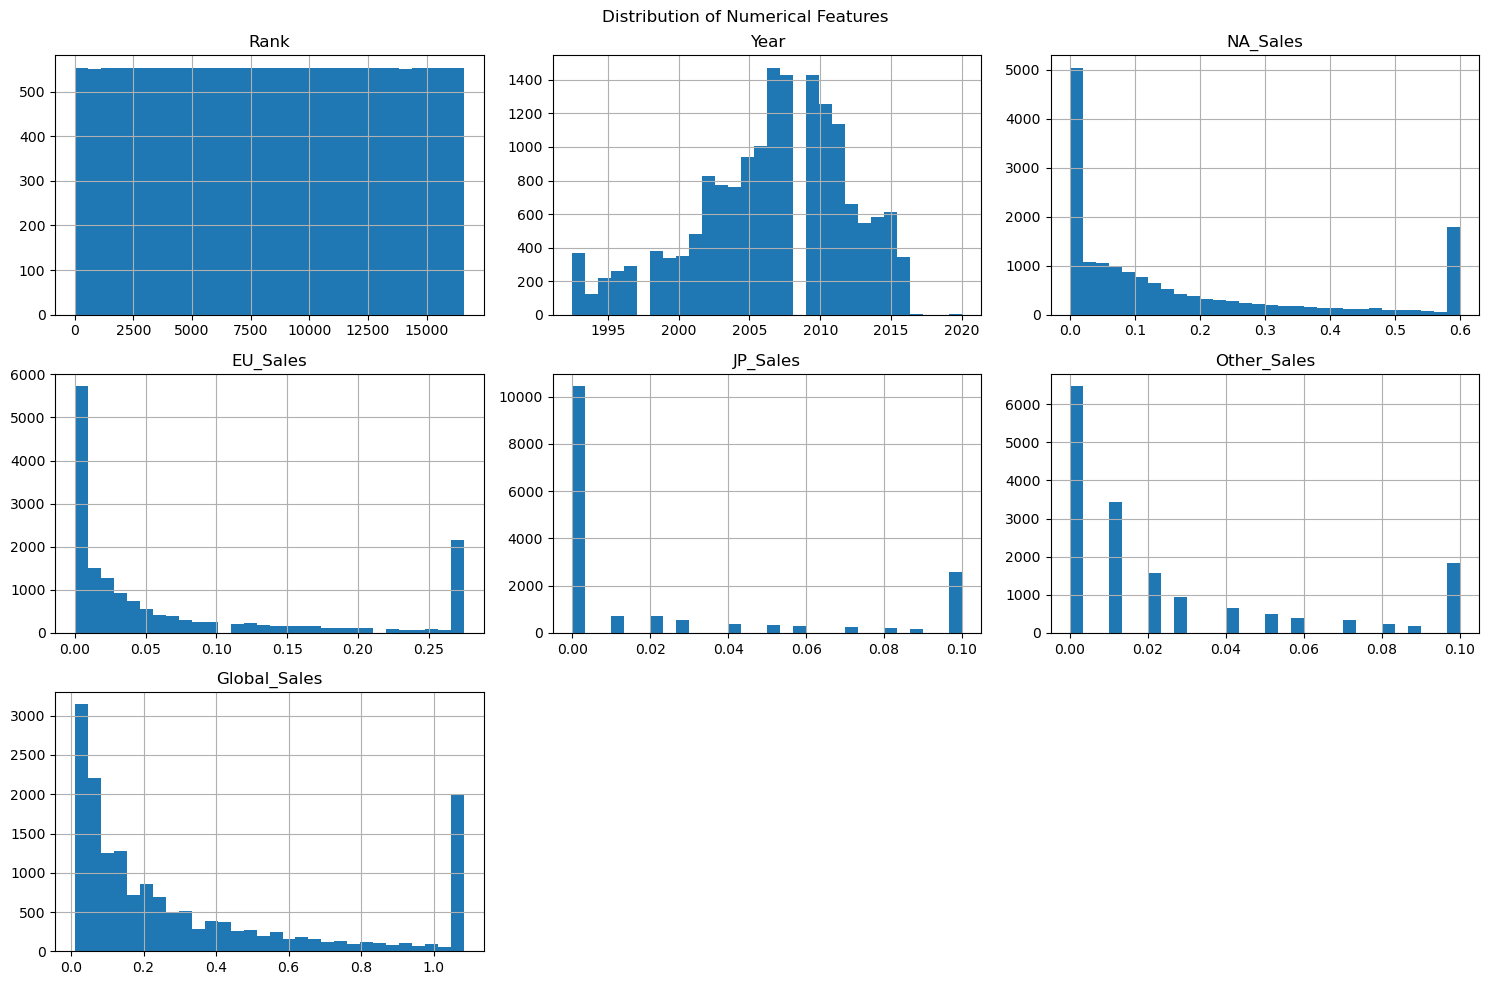

In [21]:
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

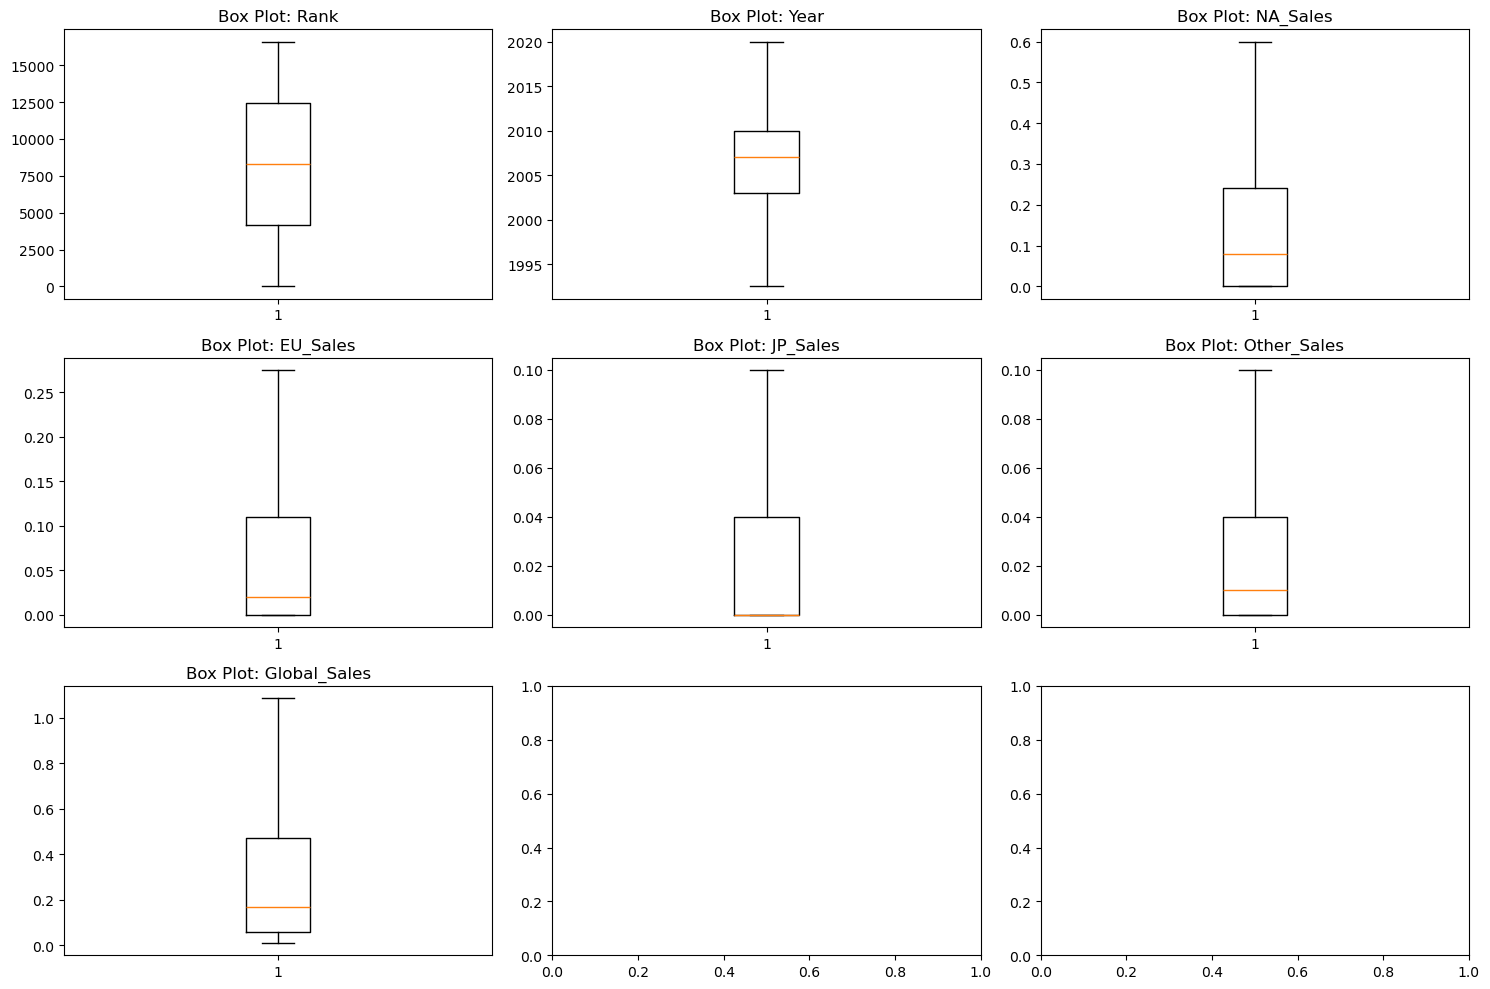

In [22]:
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.ravel()
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
plt.tight_layout()
plt.show()

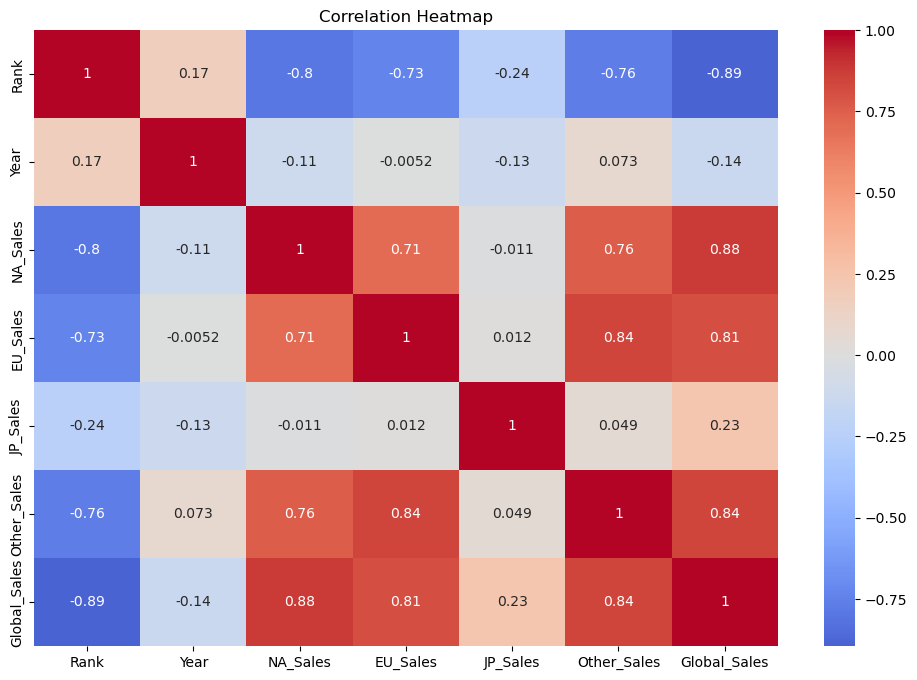

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


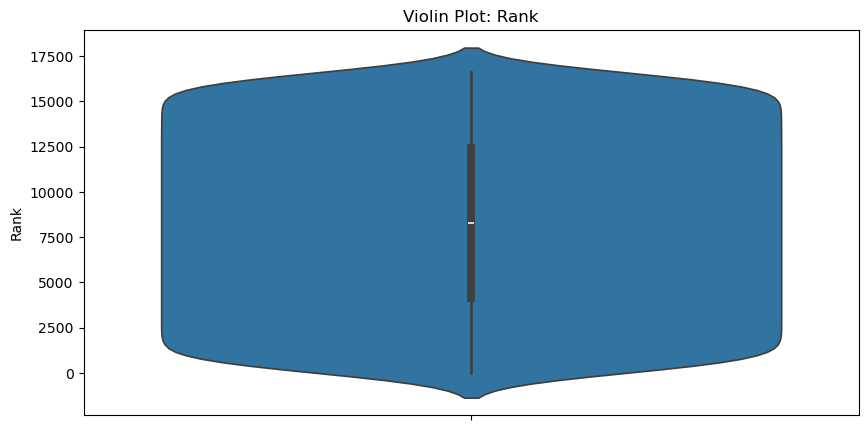

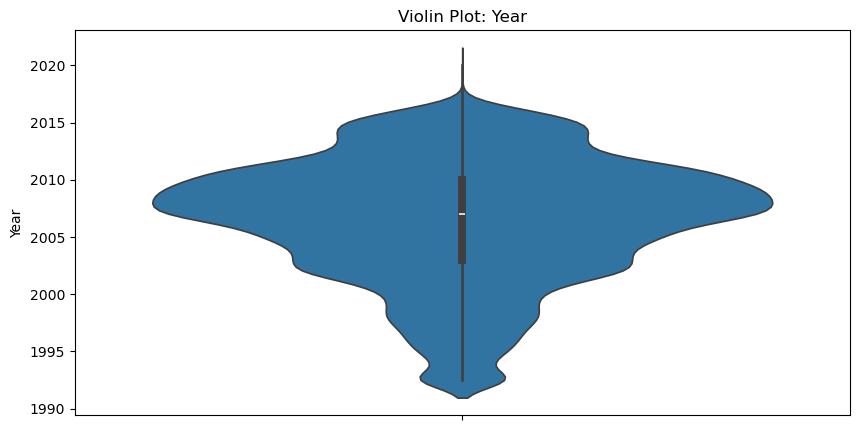

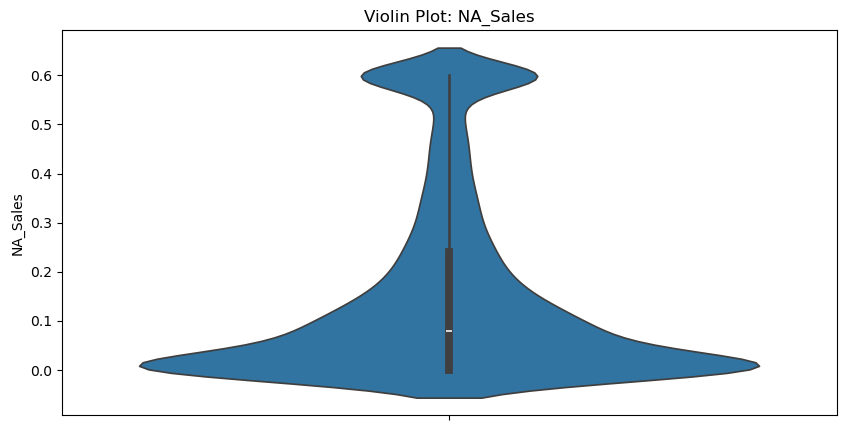

In [24]:
for col in numerical_cols[:3]:  # First 3 numerical columns
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df, y=col)
    plt.title(f'Violin Plot: {col}')
    plt.show()

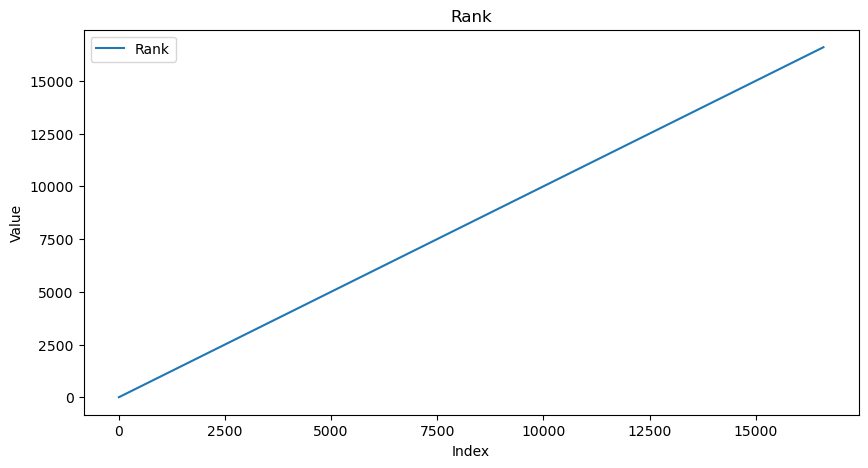

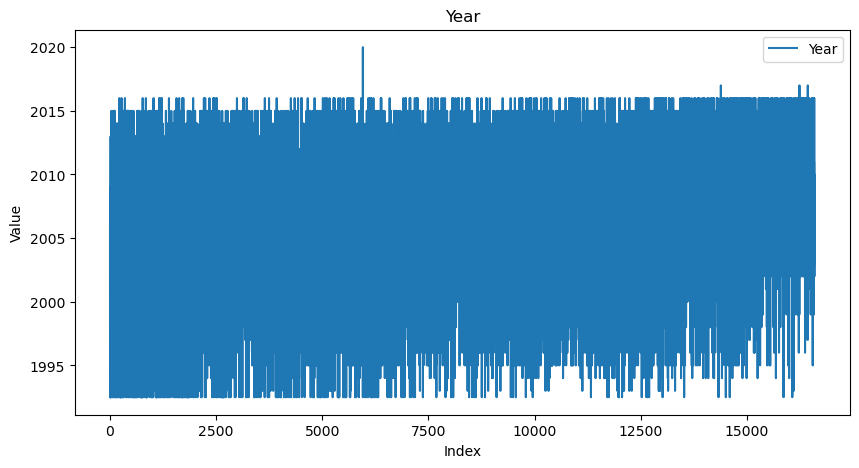

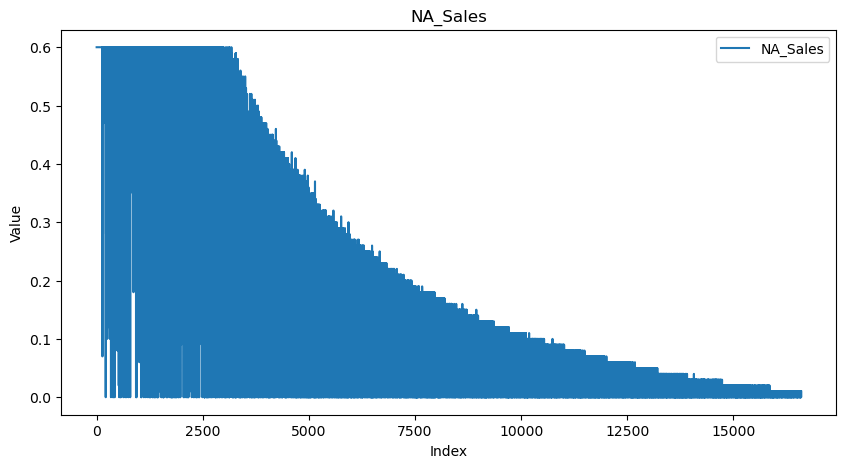

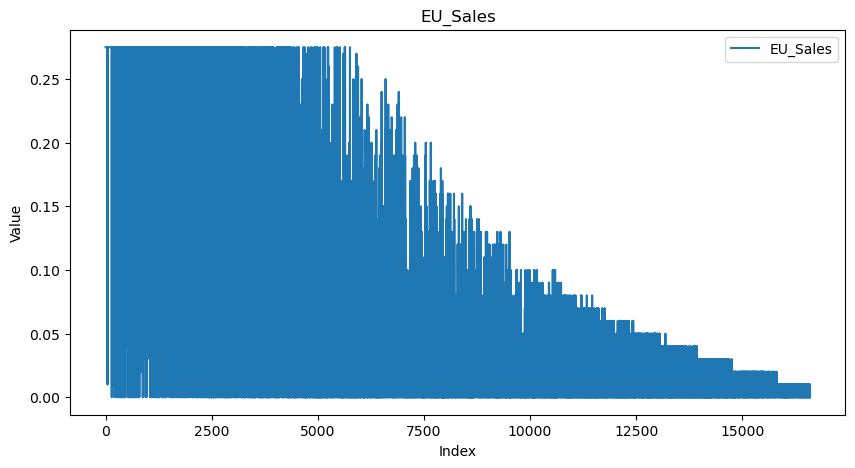

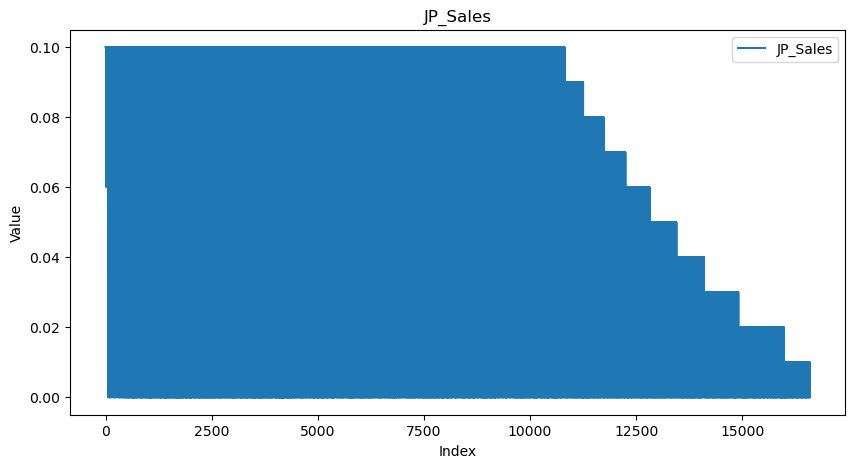

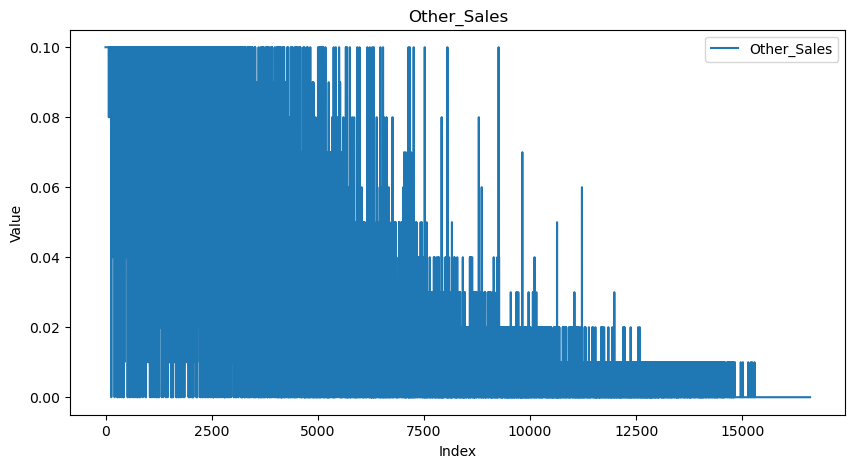

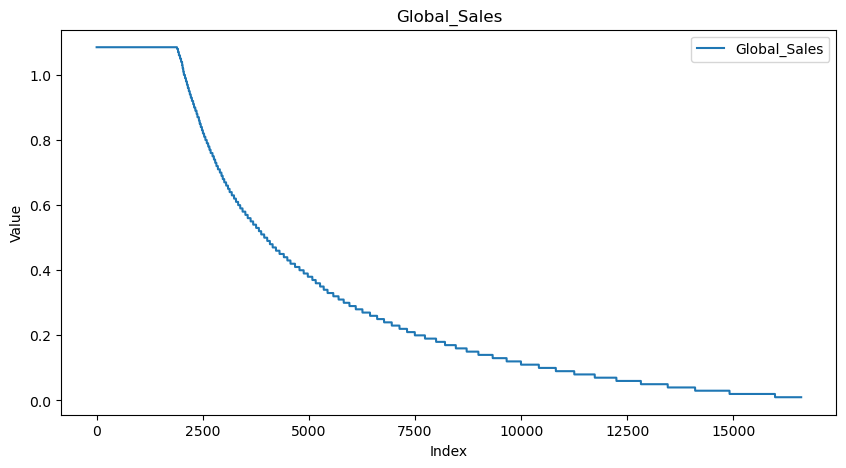

In [25]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df[col], label=col)
    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

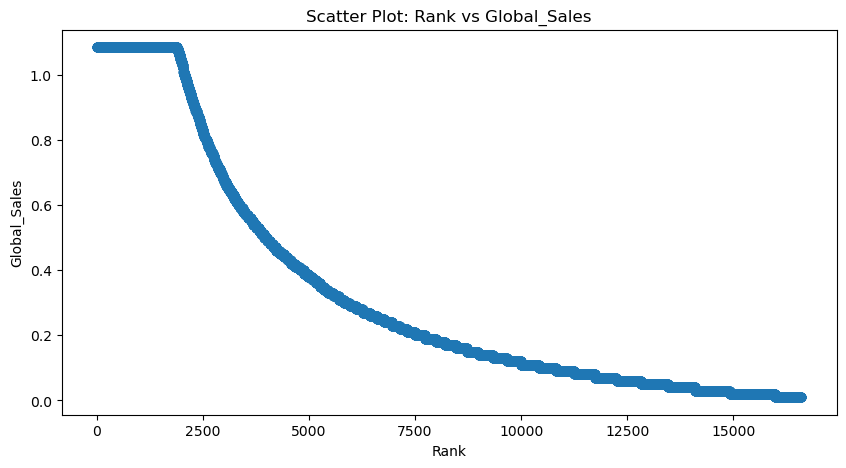

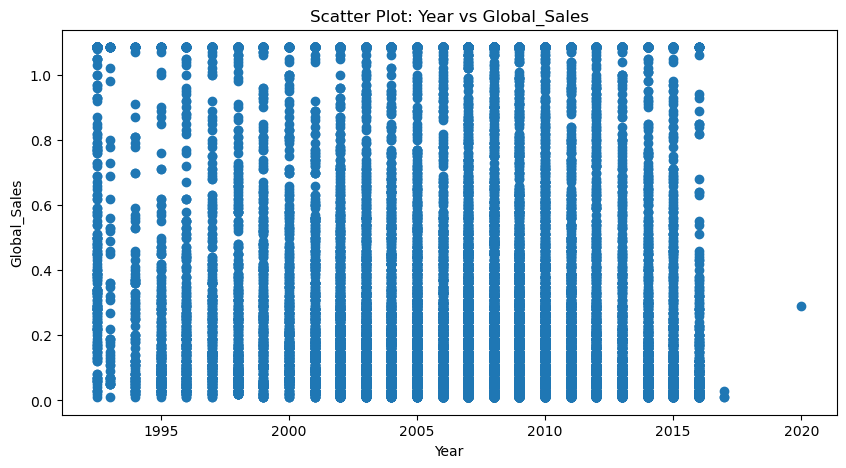

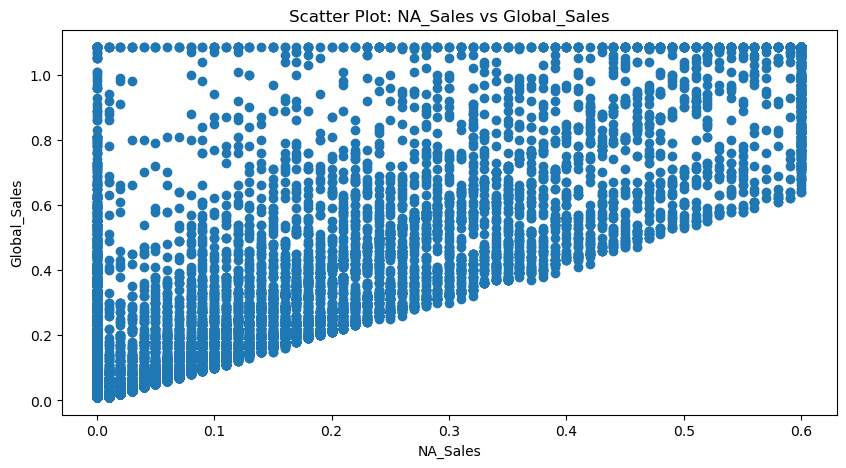

In [26]:
for col in numerical_cols[:3]:
   plt.figure(figsize=(10, 5))
   plt.scatter(df[col], df['Global_Sales'])
   plt.xlabel(col)
   plt.ylabel('Global_Sales')
   plt.title(f'Scatter Plot: {col} vs Global_Sales')
   plt.show()

# 9. Checking Skewness and Kurtosis
------------

In [27]:
skewness_kurtosis = pd.DataFrame({
    'Skewness': df[numerical_cols].apply(lambda x: skew(x.dropna())),
    'Kurtosis': df[numerical_cols].apply(lambda x: kurtosis(x.dropna()))
})
print(skewness_kurtosis)

              Skewness  Kurtosis
Rank          0.000066 -1.199865
Year         -0.554852 -0.109646
NA_Sales      1.227397  0.164377
EU_Sales      1.227730 -0.021104
JP_Sales      1.280155 -0.077583
Other_Sales   1.340559  0.397813
Global_Sales  1.173585 -0.013515


# Visualize skewness
--------------------

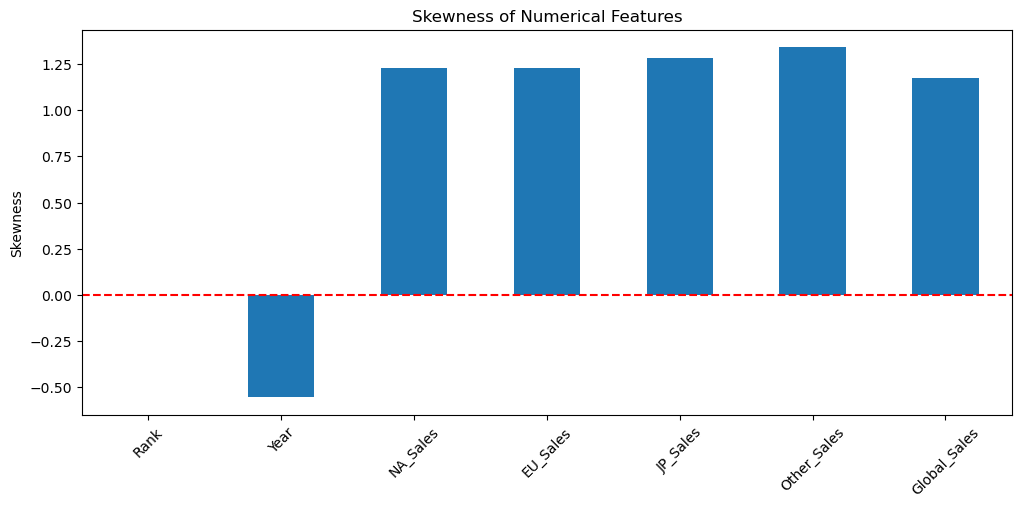

In [28]:
plt.figure(figsize=(12, 5))
skewness_kurtosis['Skewness'].plot(kind='bar')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()


# 10. Label Encoding & One-Hot Encoding
-----------------------

In [29]:
df1=df.copy()

In [30]:
label_encoder = LabelEncoder()
binary_cols = [col for col in numerical_cols if df[col].nunique() == 2]
for col in binary_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
    print(f"Label encoded: {col}")

In [31]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.60,0.275,0.1,0.1,1.085
1,2.0,Super Mario Bros.,NES,1992.5,Platform,Nintendo,0.60,0.275,0.1,0.1,1.085
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.60,0.275,0.1,0.1,1.085
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.60,0.275,0.1,0.1,1.085
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.60,0.275,0.1,0.1,1.085
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.000,0.0,0.0,0.010
16594,16597.0,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.000,0.0,0.0,0.010
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.000,0.0,0.0,0.010
16596,16599.0,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.010,0.0,0.0,0.010


#One-hot encoded
---------------

In [32]:
df1 = [col for col in numerical_cols if df[col].nunique() > 2]
multi_class_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

if len(multi_class_cols) > 0:
    df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)
    print(f"One-hot encoded: {multi_class_cols}")


One-hot encoded: ['Name', 'Platform', 'Genre', 'Publisher']


In [33]:
df1 = [col for col in numerical_cols if df[col].nunique() > 2]
if len(multi_class_cols) > 0:
    df1 = pd.get_dummies(df1, columns=df1, drop_first=True)
    print(f"One-hot encoded: {df1}")

One-hot encoded:    Global_Sales  JP_Sales  NA_Sales  Other_Sales   Rank   Year
0         False     False     False        False   True  False
1         False     False     False        False  False   True
2         False     False      True        False  False  False
3         False     False     False        False  False  False
4         False      True     False        False  False  False
5         False     False     False         True  False  False
6          True     False     False        False  False  False


In [34]:
df.shape

(16598, 12117)

In [35]:
df1 = [col for col in numerical_cols if df[col].nunique() > 2]
df1 = df[df1]
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]


In [36]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]


 # 11. Feature Selection with SelectKBest
---------------

In [37]:
k = min(10, X.shape[1])

In [38]:
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)


In [39]:
selected_features = X.columns[selector.get_support()].tolist()

In [40]:
print(selected_features)

['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


# Feature scores
-----------------

In [41]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)
print(feature_scores)

       Feature         Score
0         Rank  66710.086424
2     NA_Sales  55509.294511
5  Other_Sales  40171.406622
3     EU_Sales  31495.082272
4     JP_Sales    948.124911
1         Year    311.484153


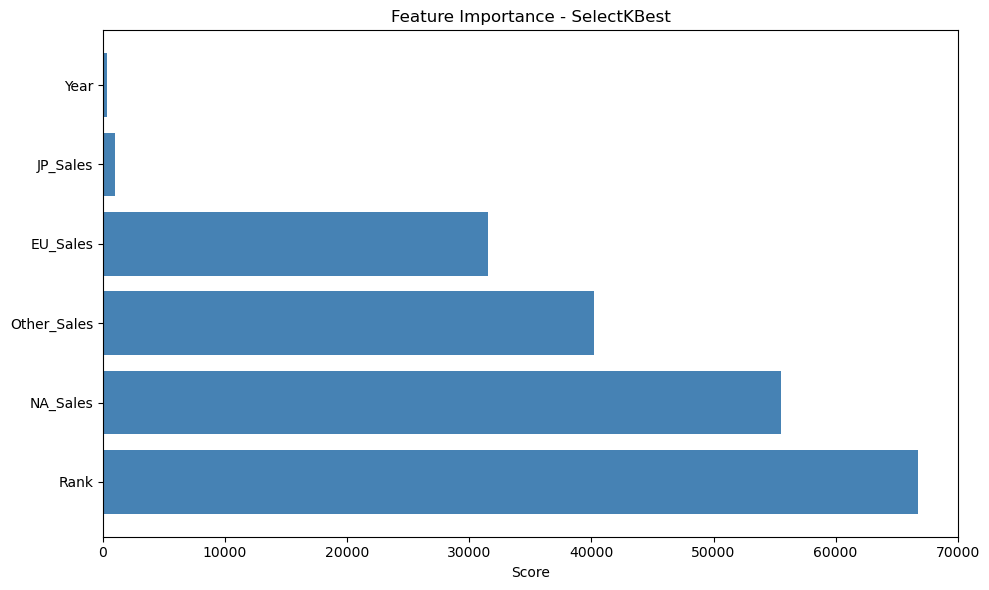

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='steelblue')
plt.xlabel('Score')
plt.title('Feature Importance - SelectKBest')
plt.tight_layout()
plt.show()

In [43]:
df1

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,2006.0,0.60,0.275,0.1,0.1,1.085
1,2.0,1992.5,0.60,0.275,0.1,0.1,1.085
2,3.0,2008.0,0.60,0.275,0.1,0.1,1.085
3,4.0,2009.0,0.60,0.275,0.1,0.1,1.085
4,5.0,1996.0,0.60,0.275,0.1,0.1,1.085
...,...,...,...,...,...,...,...
16593,16596.0,2002.0,0.01,0.000,0.0,0.0,0.010
16594,16597.0,2003.0,0.01,0.000,0.0,0.0,0.010
16595,16598.0,2008.0,0.00,0.000,0.0,0.0,0.010
16596,16599.0,2010.0,0.00,0.010,0.0,0.0,0.010


In [44]:
X = df1.drop('Global_Sales', axis=1)

In [45]:
y = df1['Global_Sales']

In [46]:
y.shape

(16598,)

# 12. Scaling
-----------------

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
scaler

StandardScaler()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

In [49]:
X_train.shape

(13278, 6)

In [50]:
X_test.shape

(3320, 6)

In [51]:
y_train.shape

(13278,)

In [52]:
y_test.shape

(3320,)

# 13. model building
---------------------

In [53]:
models_regression = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
}

In [54]:
results_regression = {}

# Loop through models
for name, model in models_regression.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f'\n{name}:')
    print("  Mean Squared Error (MSE):", mse)
    print("  Mean Absolute Error (MAE):", mae)
    print("  R² Score:", r2)


Linear Regression:
  Mean Squared Error (MSE): 0.009028371150700844
  Mean Absolute Error (MAE): 0.06454339865252917
  R² Score: 0.9274945036772478

Decision Tree Regressor:
  Mean Squared Error (MSE): 6.927710843373333e-07
  Mean Absolute Error (MAE): 6.92771084365099e-05
  R² Score: 0.9999944364591941

Random Forest Regressor:
  Mean Squared Error (MSE): 4.632115963855104e-07
  Mean Absolute Error (MAE): 8.585843373650692e-05
  R² Score: 0.9999962800170553

Support Vector Regressor:
  Mean Squared Error (MSE): 0.0023981362711885555
  Mean Absolute Error (MAE): 0.041665193531613215
  R² Score: 0.9807409268305698

KNN Regressor:
  Mean Squared Error (MSE): 0.0015160551204819277
  Mean Absolute Error (MAE): 0.013573795180722891
  R² Score: 0.9878247884221443


# 14. saving the model with joblib
----------------------------

In [55]:
import joblib

# Example: save the best model (e.g., Random Forest) after fitting
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_model, "random_forest_regressor.pkl")
print("Model saved successfully!")


Model saved successfully!


In [56]:
# Load the model
loaded_model = joblib.load("random_forest_regressor.pkl")

# Make predictions
y_pred_loaded = loaded_model.predict(X_test)


In [57]:
loaded_model

RandomForestRegressor(random_state=42)

In [58]:
y_pred_loaded

array([0.15, 0.4 , 0.02, ..., 0.02, 0.11, 0.09])